In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
x = np.array([[-4, 2],[2, 1],[1, -1],[2, 2],[1, -2]])
y = np.array([1,1,-1,-1,-1])
tm = np.array([1,0,2,1,0]) 

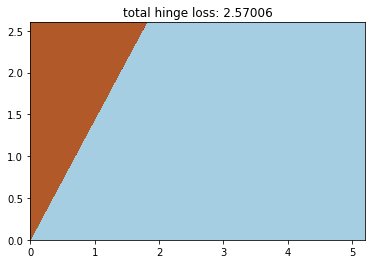

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def hinge_loss(w,x,y):
    """ evaluates hinge loss and its gradient at w

    rows of x are data points
    y is a vector of labels
    """
    loss,grad = 0,0
    for (x_,y_) in zip(x,y):
        v = y_*np.dot(w,x_)
        loss += max(0,1-v)
        grad += 0 if v > 1 else -y_*x_
    return (loss,grad)

def grad_descent(x,y,w,step,thresh=0.001):
    grad = np.inf
    ws = np.zeros((2,0))
    ws = np.hstack((ws,w.reshape(2,1)))
    step_num = 1
    delta = np.inf
    loss0 = np.inf
    while np.abs(delta)>thresh:
        loss,grad = hinge_loss(w,x,y)
        delta = loss0-loss
        loss0 = loss
        grad_dir = grad/np.linalg.norm(grad)
        w = w-step*grad_dir/step_num
        ws = np.hstack((ws,w.reshape((2,1))))
        step_num += 1
    return np.sum(ws,1)/np.size(ws,1)

def test1():
    # sample data points
    x1 = np.array((0,1,3,4,1))
    x2 = np.array((1,2,0,1,1))
    x  = np.vstack((x1,x2)).T
    # sample labels
    y = np.array((1,1,-1,-1,-1))
    w = grad_descent(x,y,np.array((0,0)),0.1)
    loss, grad = hinge_loss(w,x,y)
    plot_test(x,y,w)

def plot_test(x,y,w):
    plt.figure()
    x1, x2 = x[:,0], x[:,1]
    x1_min, x1_max = np.min(x1)*.7, np.max(x1)*1.3
    x2_min, x2_max = np.min(x2)*.7, np.max(x2)*1.3
    gridpoints = 2000
    x1s = np.linspace(x1_min, x1_max, gridpoints)
    x2s = np.linspace(x2_min, x2_max, gridpoints)
    gridx1, gridx2 = np.meshgrid(x1s,x2s)
    grid_pts = np.c_[gridx1.ravel(), gridx2.ravel()]
    predictions = np.array([np.sign(np.dot(w,x_)) for x_ in grid_pts]).reshape((gridpoints,gridpoints))
    plt.contourf(gridx1, gridx2, predictions, cmap=plt.cm.Paired)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title('total hinge loss: %g' % hinge_loss(w,x,y)[0])
    plt.show()

if __name__ == '__main__':
    np.set_printoptions(precision=3)
    test1()

## Perceptron algorithm

In [5]:
import numpy as np

class Perceptron(object):
    """
    Perceptron classifier
    
    Parameters
    ----------------------
    eta: (float) Learning rate (between 0.0 and 1.0)
    n_iter: (int) Passes over the training data
    random_state: (int)
    Random number generator seed for random weight initialization.
    
    Attributes
    ----------------------
    w_: (1d-array) Weights after fitting
    errors: (list) Number of misclassification (updates) in epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state =  random_state
        
    def fit(self, X, Y):
        """
        Fit training data.
        
        X: (array-like), shape = [n_examples, n_features], Training vectors.
        Y: (array-like), shape = [n_examples], Target values.
        
        Returns self: object
        """
        
        r_gen = np.random.RandomState(self.random_state)
        self.w_ = r_gen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, Y):
                update = self.eta * (target-self.predict(xi))
                self.w_[1] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)